# Comparing HSC and HST/COSMOS data

Modified from the following notebooks:

[hsc_cosmos_match.ipynb](https://github.com/lsst-com/notebooks/blob/master/hsc_cosmos_match.ipynb) originally written by Keith Bechtol & Chris Walter

[Spurious_match_catalog.ipynb](https://github.com/lsst-com/notebooks/blob/master/Spurious_match_catalog.ipynb) by Tiago Ribeiro and Andy Connolly



We will work with COSMOS catalogs retrieved from the morphology and photometry directories of this site: 

https://irsa.ipac.caltech.edu/data/COSMOS/tables/

and located on NCSA servers at `/project/shared/data/COSMOS_catalogs/`



For testing star-galaxy separation, the catalog described here is commonly used:

From https://arxiv.org/abs/1805.02427

>The dataset on which we train the machine learning (ML)
codes  is  the  weak  lensing  catalog  from  HST  ACS  in  the
COSMOS  field (Leauthaud  et  al.  2007),  as  this  provides  a
largely unbiased measurement of all extended and point-like
sources from DES (albeit the star-galaxy mixture is affected
by the specific position in the sky with respect to the Galactic  plane).  In  particular,  the
MU_CLASS parameter  is  used for  this  reference,  defined  in  the  peak  surface  brightness  -
MAG_AUTO space,  which  in  space-based  imaging  shows  very
distinct loci with respect to the same objects viewed through
the atmosphere. This has been used previously in star-galaxy
separation assessments in, e.g., Crocce et al. (2016) and Aihara et al. (2018).

More info, and a direct link to that catalog:

Leauthaud  et  al.  2007: https://ui.adsabs.harvard.edu/#abs/2007ApJS..172..219L/abstract

Catalog (NOTE: 1.2GB file!): https://irsa.ipac.caltech.edu/data/COSMOS/tables/photometry/cosmos_acs_iphot_200709.tbl

Documentation: https://irsa.ipac.caltech.edu/data/COSMOS/gator_docs/cosmos_acs_colDescriptions.html

You could also do a `wget https://irsa.ipac.caltech.edu/data/COSMOS/tables/photometry/cosmos_acs_iphot_200709.tbl`

In [184]:
import os
import glob
import gzip
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# Set up some plotting defaults:
plt.rcParams.update({'figure.figsize' : (11, 8)})
plt.rcParams.update({'font.size' : 20})
plt.rcParams.update({'axes.linewidth' : 3})
plt.rcParams.update({'axes.labelweight' : 3})
plt.rcParams.update({'axes.titleweight' : 3})
plt.rcParams.update({'ytick.major.width':3})
plt.rcParams.update({'ytick.minor.width':2})
plt.rcParams.update({'ytick.major.size':8})
plt.rcParams.update({'ytick.minor.size':5})
plt.rcParams.update({'xtick.major.size':8})
plt.rcParams.update({'xtick.minor.size':5})
plt.rcParams.update({'xtick.major.width':3})
plt.rcParams.update({'xtick.minor.width':2})
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})

Reading the COSMOS HST/ACS weak lensing catalog. Note that the HST/ACS weak lensing catalog is a 1.2G text file. To speed up this demo, we've converted the catalog to HDF5 format, which can be read quickly into a pandas dataframe:

(NOTE: You may have to do a `pip install --user tables` at the command line to get this to work.)

In [54]:
datadir_cosmos = '/project/shared/data/COSMOS_catalogs/'
infile_cosmos = datadir_cosmos + 'cosmos_acs_iphot_200709.h5'
df_cosmos = pd.read_hdf(infile_cosmos, 'df')

In [224]:
# What's in the catalog?
print(df_cosmos.shape)
df_cosmos

(1177274, 60)


,number,mag_iso,magerr_iso,mag_isocor,magerr_isocor,mag_petro,magerr_petro,petro_radius,mag_aper,magerr_aper,...,cxy_image,elongation,class_star,field,mu_class,x,y,z,spt_ind,cntr
0,7,25.011913,0.037696,24.427568,0.055698,24.419535,0.072279,7.259999,25.088701,0.043149,...,-0.105052,2.493634,0.000160,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860774,0.507116,0.043610,220212312,1
1,8,24.389151,0.025388,24.144999,0.037031,23.661472,0.051026,10.560000,24.335344,0.026037,...,-0.018387,1.150967,0.019758,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860765,0.507144,0.043452,220212312,2
2,10,23.956926,0.018109,23.787031,0.024735,23.604761,0.032705,7.259999,24.030365,0.018158,...,0.007276,1.101711,0.281359,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860767,0.507134,0.043531,220212312,3
3,16,24.887758,0.028632,24.682690,0.040656,24.469540,0.053768,7.259999,24.735888,0.031832,...,0.042768,1.277476,0.087045,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860758,0.507151,0.043511,220212312,4
4,17,20.882307,0.002660,20.873367,0.002704,20.902988,0.002576,3.500000,20.924545,0.002550,...,0.001963,1.025627,0.992961,acs_I_095751+0228_unrot_sci_12.fits,2,-0.860757,0.507149,0.043553,220212312,5
5,21,23.694363,0.017849,23.424170,0.026065,23.275284,0.032172,6.599999,24.432056,0.025409,...,-0.048445,3.646455,0.000417,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860738,0.507186,0.043498,220212312,6
6,22,24.341871,0.024565,24.032614,0.036572,23.578505,0.044696,9.240000,24.491474,0.026328,...,-0.055762,1.864077,0.000318,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860738,0.507187,0.043500,220212312,7
7,23,24.523901,0.029127,24.052286,0.043844,23.714767,0.055619,9.240000,24.854565,0.035715,...,-0.076338,3.112289,0.000172,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860734,0.507197,0.043444,220212312,8
8,24,24.017153,0.014629,23.962391,0.016682,23.968294,0.017766,3.960000,23.976557,0.017275,...,-0.005030,1.023215,0.974392,acs_I_095751+0228_unrot_sci_12.fits,2,-0.860739,0.507179,0.043558,220212312,9
9,25,22.990147,0.013251,22.712029,0.019367,22.541523,0.026930,7.919999,23.851458,0.016373,...,-0.000769,1.249470,0.000487,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860707,0.507288,0.042932,220212312,10


In [225]:
# What columns are in the COSMOS data?
df_cosmos.columns

Index(['number', 'mag_iso', 'magerr_iso', 'mag_isocor', 'magerr_isocor',
       'mag_petro', 'magerr_petro', 'petro_radius', 'mag_aper', 'magerr_aper',
       'mag_auto', 'magerr_auto', 'mag_best', 'magerr_best', 'flux_auto',
       'fluxerr_auto', 'kron_radius', 'background', 'threshold', 'flux_max',
       'flux_radius', 'isoarea_image', 'x_image', 'y_image', 'xmin_image',
       'ymin_image', 'xmax_image', 'ymax_image', 'xpeak_image', 'ypeak_image',
       'alphapeak_j2000', 'deltapeak_j2000', 'a_image', 'b_image', 'ra', 'dec',
       'theta_image', 'mu_threshold', 'mu_max', 'isoarea_world', 'x_world',
       'y_world', 'a_world', 'b_world', 'theta_world', 'flags', 'fwhm_image',
       'fwhm_world', 'cxx_image', 'cyy_image', 'cxy_image', 'elongation',
       'class_star', 'field', 'mu_class', 'x', 'y', 'z', 'spt_ind', 'cntr'],
      dtype='object')

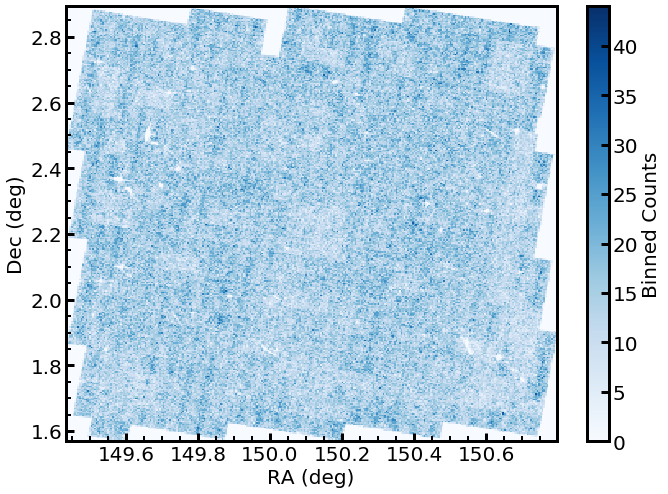

In [188]:
# Plot positions of COSMOS objects
plt.figure()
#plt.scatter(df_cosmos['ra'], df_cosmos['dec'], marker='.', s=1)
plt.hist2d(df_cosmos['ra'], df_cosmos['dec'], bins=(300, 300), cmap='Blues')
plt.colorbar(label='Binned Counts')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.minorticks_on()
plt.show()

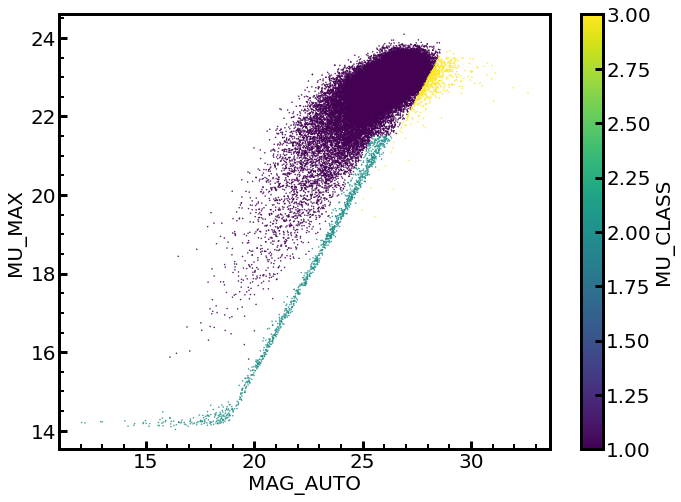

In [187]:
# Another sanity check plot, looking at star-galaxy separation in COSMOS

# subsample randomly to make plotting faster:
idx = np.random.choice(np.arange(len(df_cosmos)), 50000)

plt.figure()
plt.scatter(df_cosmos['mag_auto'][idx], df_cosmos['mu_max'][idx], c=df_cosmos['mu_class'][idx], marker='.', s=1)
#plt.hist2d(df_cosmos['mag_auto'], df_cosmos['dec'], bins=(300, 300), cmap='Blues')
plt.colorbar(label='MU_CLASS')
plt.xlabel('MAG_AUTO')
plt.ylabel('MU_MAX')
plt.minorticks_on()
plt.show()

# HSC Catalogs

Information available here: https://confluence.lsstcorp.org/display/DM/S18+HSC+PDR1+reprocessing

The output repos are: 

    /datasets/hsc/repo/rerun/DM-13666/UDEEP/
    /datasets/hsc/repo/rerun/DM-13666/DEEP/
    /datasets/hsc/repo/rerun/DM-13666/WIDE/
    
HSC SSP PDR1 data, as described in DMTR-31 Sect 1; this is the same as S17B HSC PDR1 reprocessing. It includes 5654 visits in 7 bands and 3 layers (386 visits in UDEEP, 668 visits in DEEP, and 4600 visits in WIDE). It has 11 tracts in UDEEP, 37 tracts in DEEP, and 91 tracts in WIDE. The tract IDs can be found in https://hsc-release.mtk.nao.ac.jp/doc/index.php/database/ (except tract=9572) or the first table on the S17B HSC PDR1 reprocessing page. 

The first thing we need to do is know what tracts and patches overlap with the COSMOS field. One way to do this is to find the center of each patch using the BBox from the deepCoadd calexp. Unfortunately, this is quite slow (~1 sec per patch) and there are ~6000 patches in the WIDE layer.

A much better approach is to get the `deepCoadd_skyMap` object from the butler.

In [60]:
import lsst.daf.persistence as daf_persistence

In [61]:
depth = 'DEEP'
butler = daf_persistence.Butler('/datasets/hsc/repo/rerun/DM-13666/%s/'%(depth))

This is a kludge to get the available patches in the dataset:

In [62]:
infiles = glob.glob('/datasets/hsc/repo/rerun/DM-13666/%s/deepCoadd-results/HSC-I/*/*/calexp-*.fits'%(depth))
print(len(infiles))

1303


The next cell finds the center of each patch

In [67]:
def getPatchCenter(skymap, tract, patch):
    # Find the center of the patch BBox in pixel coordinates and convert with tract WCS
    patch = list(map(int, patch.split(',')))
    wcs = skymap.generateTract(tract).getWcs()
    bbox = skymap.generateTract(tract).getPatchInfo(patch).getInnerBBox()
    sky = wcs.pixelToSky(np.mean((bbox.getBeginX(), bbox.getEndX())), 
                         np.mean((bbox.getBeginY(), bbox.getEndY())))
    return sky[0].asDegrees(), sky[1].asDegrees()

tract_array = []
patch_array = []

# Each line of "infiles" looks like this (infile[0]):
# '/datasets/hsc/repo/rerun/DM-13666/DEEP/deepCoadd-results/HSC-I/17130/8,8/calexp-HSC-I-17130-8,8.fits'

# Split on the '/', then parse the resulting array. Here's the result of infiles[0].split('/'):
#['',
# 'datasets',
# 'hsc',
# 'repo',
# 'rerun',
# 'DM-13666',
# 'DEEP',
# 'deepCoadd-results',
# 'HSC-I',
# '17130',
# '8,8',
# 'calexp-HSC-I-17130-8,8.fits']

# So the tract number is third from the end, and patch is second from the end.

for ii in range(0, len(infiles)):
    parts = infiles[ii].split('/')
    tract_array.append(int(parts[-3]))
    patch_array.append(parts[-2])

print('Found %i patches'%(len(patch_array)))
    
skymap = butler.get('deepCoadd_skyMap')
    
ra_center_array = np.tile(0., len(patch_array))
dec_center_array = np.tile(0., len(patch_array))
for ii, (tract, patch) in enumerate(zip(tract_array, patch_array)):
    ra_center_array[ii], dec_center_array[ii] = getPatchCenter(skymap, tract, patch)
    
# Assemble in pandas data frame    
data = {'tract': tract_array,
        'patch': patch_array, 
        'ra_center': ra_center_array, 
        'dec_center': dec_center_array}
df_tract_patch = pd.DataFrame(data=data)

Found 1303 patches


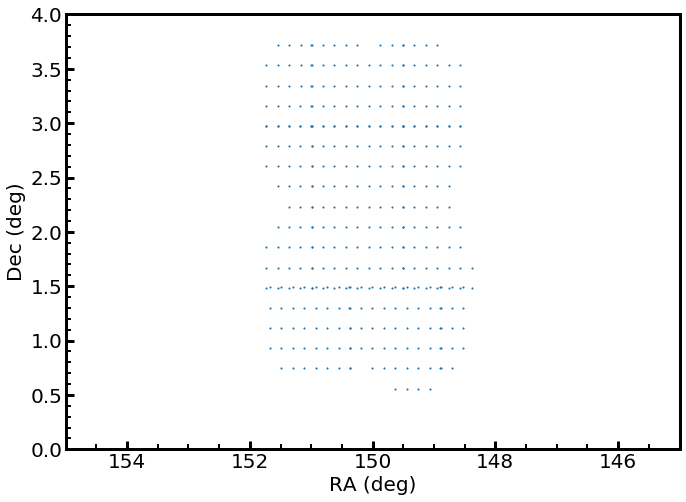

In [189]:
# Plot RA, Dec of patch centers:
plt.figure()
plt.scatter(df_tract_patch['ra_center'], df_tract_patch['dec_center'], marker='.', s=5)
# Centered on COSMOS field
plt.xlim(155., 145.)
plt.ylim(0., 4.)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.minorticks_on()

Determine patches that overlap with the COSMOS field. We'll use Astropy tools for coordinate matching.

In [101]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy import units as u

# Create "SkyCoord" objects for the central coordinate of COSMOS, and the patch centers of HSC:
cosmos_patch_cen = SkyCoord(np.median(df_cosmos['ra'])*u.degree, np.median(df_cosmos['dec'])*u.degree, frame='icrs')
hsc_patch_cen = SkyCoord(df_tract_patch['ra_center'].values*u.degree, df_tract_patch['dec_center'].values*u.degree, frame='icrs')

# Calculate the separation (in degrees) of each HSC patch from the COSMOS center:
sep_patches = hsc_patch_cen.separation(cosmos_patch_cen)

# Pick patches within 'size_select' deg of COSMOS center:
size_select = 0.15 # in degrees
selection_patch = (sep_patches.degree < size_select) 
print('Number of patches selected: ',np.sum(selection_patch))

Number of patches selected:  2


Now loop over the overlapping patches to create a merged HSC catalog containing the columns of interest.

A selection for good quality objects is also included at this stage. Some recommended selection criteria are available here: 
* "Getting started tutorial part 6: analyzing measurement catalogs in multiple bands": https://pipelines.lsst.io/getting-started/multiband-analysis.html
* "First Data Release of the Hyper Suprime-Cam Subaru Strategic Program": https://arxiv.org/abs/1702.08449 (Table 4)


In [102]:
# We must select object catalogs individually from the butler, then concatenate them.

coadd_forced_src_array = []
for ii in np.nonzero(selection_patch)[0]:
    tract, patch = df_tract_patch['tract'][ii], df_tract_patch['patch'][ii] 
    print('Tract, patch: ',tract, patch)
    dataid = {'filter':'HSC-I', 'tract':tract, 'patch':patch}
    coadd_forced_src = butler.get('deepCoadd_forced_src', dataId=dataid)
    coadd_ref = butler.get('deepCoadd_ref', dataId=dataid)
    coadd_calib = butler.get('deepCoadd_calexp_calib', dataId=dataid)
    
    selection_catalog = coadd_ref['detect_isPrimary'] \
        & ~coadd_forced_src['base_SdssCentroid_flag'] \
        & ~coadd_forced_src['base_PixelFlags_flag_interpolated'] \
        & ~coadd_forced_src['base_PixelFlags_flag_saturated'] \
        & ~coadd_forced_src['base_PsfFlux_flag'] \
        & ~coadd_forced_src['modelfit_CModel_flag']
    
    coadd_calib.setThrowOnNegativeFlux(False)
    psf_mag = coadd_calib.getMagnitude(coadd_forced_src['base_PsfFlux_flux'])
    cm_mag = coadd_calib.getMagnitude(coadd_forced_src['modelfit_CModel_flux'])
    
    data = {'ra': np.degrees(coadd_forced_src['coord_ra'][selection_catalog]),
            'dec': np.degrees(coadd_forced_src['coord_dec'][selection_catalog]),
            'psf_mag': psf_mag[selection_catalog],
            'cm_mag': cm_mag[selection_catalog]}
    coadd_forced_src_array.append(pd.DataFrame(data=data))

dir(coadd_forced_src)
df_hsc = pd.concat(coadd_forced_src_array)

Tract, patch:  9813 5,4
Tract, patch:  9813 4,4


In [103]:
np.max(df_hsc['ra']), np.min(df_hsc['ra']), np.max(df_hsc['dec']), np.min(df_hsc['dec']), np.all(np.isfinite(df_hsc['ra'])), np.all(np.isfinite(df_hsc['dec']))

(150.34131333310995,
 149.96772965408408,
 2.324753841133734,
 2.138094908813054,
 True,
 True)

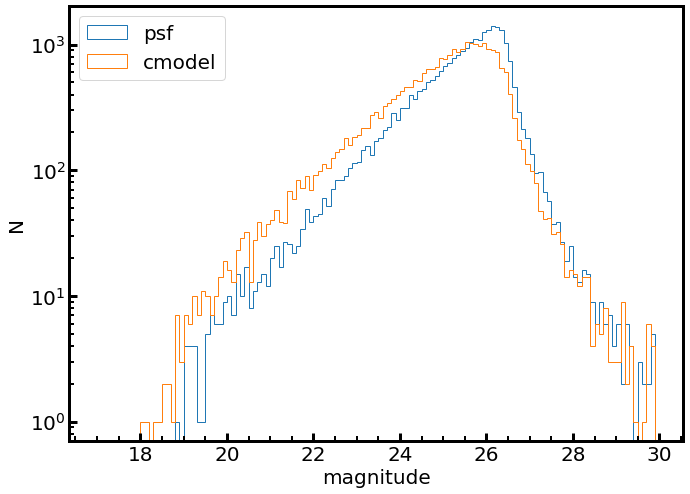

In [190]:
# Check their magnitude distribution:
plt.figure()
plt.yscale('log')
plt.hist(df_hsc['psf_mag'], bins=np.arange(17., 30., 0.1), range=(17., 30.), histtype='step', label='psf')
plt.hist(df_hsc['cm_mag'], bins=np.arange(17., 30., 0.1), range=(17., 30.), histtype='step', label='cmodel')
plt.legend(loc='upper left')
plt.xlabel('magnitude')
plt.ylabel('N')
plt.minorticks_on()

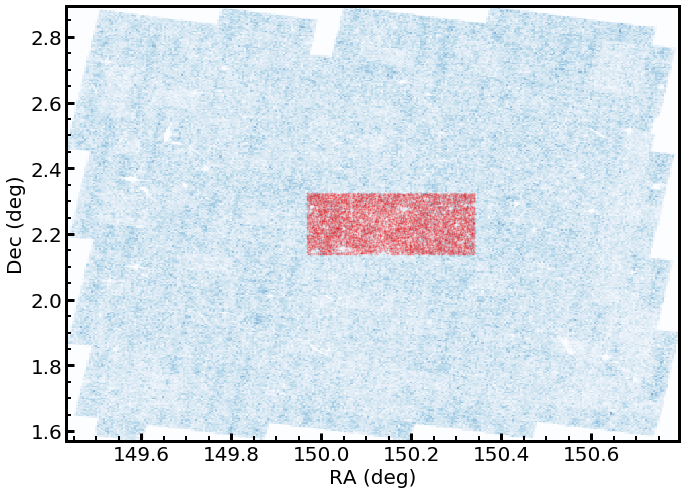

In [191]:
# plot the COSMOS data footprint, with selected HSC patches overlaid:
plt.figure()
bins = plt.hist2d(df_cosmos['ra'], df_cosmos['dec'], bins=(300, 300), cmap='Blues', alpha=0.5)[1:]
plt.scatter(df_hsc['ra'], df_hsc['dec'], c='red', marker='.', s=1, alpha=0.1)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.minorticks_on()
plt.show()

In [119]:
# Mask out sources with 'NaN' values:
mask = np.isfinite(df_hsc['cm_mag'])
hsc_ra = np.array(df_hsc['ra'].values[mask])
hsc_dec = np.array(df_hsc['dec'].values[mask])
hsc_mag = np.array(df_hsc['cm_mag'].values[mask])

In [150]:
# Get RA, Dec catalogs and convert to astropy SkyCoords 
mask = np.isfinite(df_cosmos['mag_auto'])
cosmos_ra = np.array(df_cosmos['ra'].values[mask])
cosmos_dec = np.array(df_cosmos['dec'].values[mask])
cosmos_mag = np.array(df_cosmos['mag_auto'].values[mask])
cosmos_coords = SkyCoord(cosmos_ra*u.degree,
                       cosmos_dec*u.degree, frame='icrs')
hsc_coords = SkyCoord(hsc_ra*u.degree,
                       hsc_dec*u.degree, frame='icrs')

In [121]:
# Match with the kd-tree routine from Astropy - note that all sources will be matched irrespective of distance
index, dist2d, dist3d = match_coordinates_sky(hsc_coords, cosmos_coords,
                                              nthneighbor=1, storekdtree=False)

/opt/lsst/software/stack/python/miniconda3-4.5.4/envs/lsst-scipipe-10a4fa6/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/opt/lsst/software/stack/python/miniconda3-4.5.4/envs/lsst-scipipe-10a4fa6/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


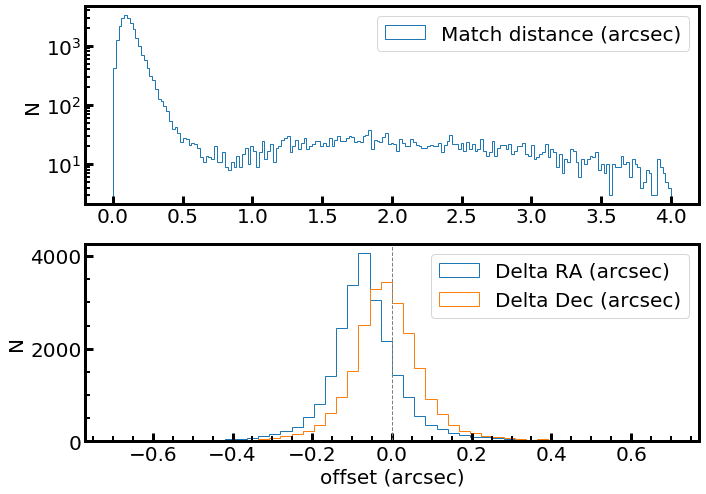

In [193]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
bins = np.linspace(0., 4., 200.)
ax.set_yscale('log')
ax.hist(dist2d.arcsec, bins=bins, range=(-1., 1.), histtype='step', label='Match distance (arcsec)')
ax.legend(loc='upper right')
ax.set_ylabel('N')

ax = fig.add_subplot(2,1,2)
ax.axvline(0., c='0.5', ls='--', lw=1)
bins = np.linspace(-0.7, 0.7, 51.)
#bins = np.linspace(-.002, .002, 51.)
ax.hist(delta_ra, bins=bins, range=(-1., 1.), histtype='step', label='Delta RA (arcsec)')
ax.hist(delta_dec, bins=bins, range=(-1., 1.), histtype='step', label='Delta Dec (arcsec)')
ax.legend(loc='upper right')
ax.set_ylabel('N')
ax.set_xlabel('offset (arcsec)')
ax.minorticks_on()


Hmmm... There appears to be a small systematic offset in the RA coordinates between HSC and COSMOS.

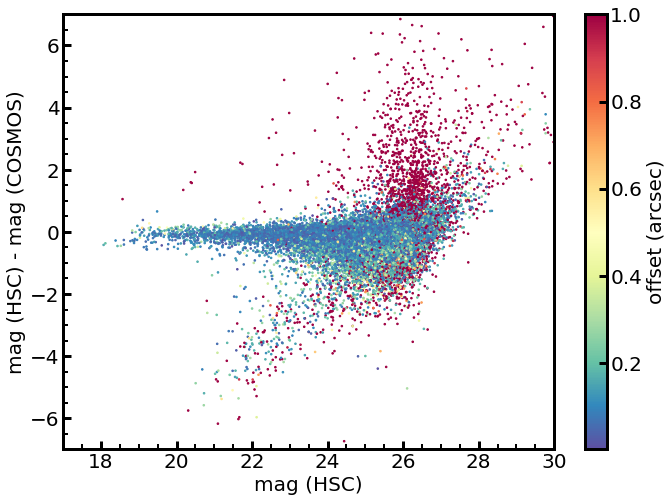

In [227]:
# Magnitude comparison (color-code by offset between HSC/COSMOS matches):
plt.figure()
plt.scatter(hsc_mag, 
            hsc_mag - cosmos_mag[index], c=dist2d.arcsec,
            marker='.', s=10, vmax=1, cmap='Spectral_r')
cb1 = plt.colorbar()
plt.xlim(17,30)
plt.ylim(-7,7)
plt.xlabel('mag (HSC)')
plt.ylabel('mag (HSC) - mag (COSMOS)')
cb1.set_label('offset (arcsec)')
plt.minorticks_on()

Interesting pattern in the outlier distribution. However, it appears that most of the outliers are simply bad matches (i.e., with offsets >= 1.0 arcsec).

### Check the completeness as a function of magnitude, assuming COSMOS as a truth table

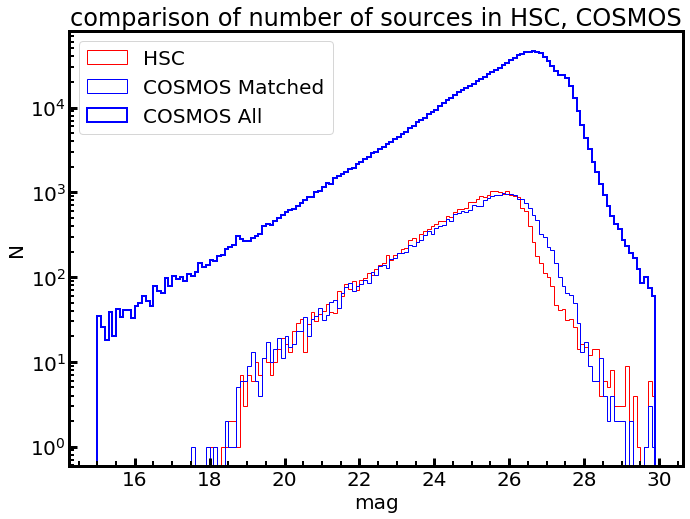

In [198]:
# First, let's check out the number of objects in each dataset:

plt.figure()
plt.yscale('log')
bins = np.arange(15., 30., 0.1)
plt.hist(hsc_mag, bins=bins, color='red',range=(15., 30.), histtype='step', label='HSC')
plt.hist(cosmos_mag[index], bins=bins, color='blue', range=(15., 30.), histtype='step', label='COSMOS Matched')
plt.hist(cosmos_mag, bins=bins, color='blue', range=(15., 30.), histtype='step', lw=2, label='COSMOS All')
#plt.hist(df_hsc['cm_mag'].iloc[match_hsc], bins=bins, color='red',range=(15., 30.), histtype='step', label='HSC Matched')
#plt.hist(df_cosmos['mag_auto'].iloc[match_cosmos], bins=bins, color='blue', range=(15., 30.), histtype='step', label='COSMOS Matched')
#plt.hist(df_cosmos['mag_auto'], bins=bins, color='blue', range=(15., 30.), histtype='step', lw=2, label='COSMOS All')
plt.legend(loc='upper left')
plt.xlabel('mag')
plt.ylabel('N')
plt.title('comparison of number of sources in HSC, COSMOS')
plt.minorticks_on()

HSC DEEP data appears to be roughly the same depth as HST COSMOS. However, the magnitude distributions don't match up at the faint end, so there must be some spurious matches.

Let's check the _completeness_ (i.e., the number of COSMOS sources that were detected in the HSC data) and the _spurious_ fraction (number of false matches) as a function of magnitude. (Since we accepted the nearest match for each object from HSC, the completeness+spurious fraction should sum to one.)

/opt/lsst/software/stack/python/miniconda3-4.5.4/envs/lsst-scipipe-10a4fa6/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/opt/lsst/software/stack/python/miniconda3-4.5.4/envs/lsst-scipipe-10a4fa6/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/lsst/software/stack/python/miniconda3-4.5.4/envs/lsst-scipipe-10a4fa6/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in true_divide
/opt/lsst/software/stack/python/miniconda3-4.5.4/envs/lsst-scipipe-10a4fa6/lib/python3.6/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in true_divide


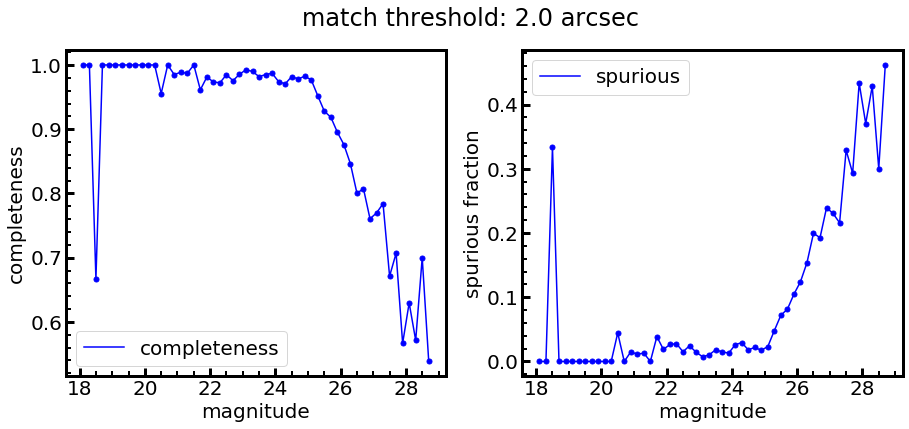

In [228]:
#plot completeness and spuriousness

match_radius = 2.0 # radius (in arcseconds) beyond which a match is considered a "wrong" (spurious) match.

#number of cosmos with hsc match
binsize = 0.2
bins = np.arange(10.,29.,binsize)
num_cosmos, edges = np.histogram(cosmos_mag, bins=bins, range=(10.,29.))
good_hsc, edges = np.histogram(hsc_mag[dist2d.arcsec < match_radius], bins=bins, range=(10.,29.))

bad_hsc, edges = np.histogram(hsc_mag[dist2d.arcsec > match_radius], bins=bins, range=(10.,29.))
all_hsc, edges = np.histogram(hsc_mag, bins=bins, range=(10.,29.))

centers = edges+(binsize/2.0)

fig = plt.figure(figsize=(15,6))
plt.suptitle('match threshold: '+str(match_radius)+' arcsec')
ax = fig.add_subplot(1,2,1)
ax.plot(centers[:-1],good_hsc/all_hsc, color='blue',label='completeness')
ax.plot(centers[:-1],good_hsc/all_hsc, '.', ms=10, color='blue')
ax.set_xlabel('magnitude')
ax.set_ylabel('completeness')
ax.legend(loc='lower left')
ax.minorticks_on()

ax = fig.add_subplot(1,2,2)
ax.plot(centers[:-1],bad_hsc/all_hsc, color='blue', label='spurious')
ax.plot(centers[:-1],bad_hsc/all_hsc, '.', ms=10, color='blue')
ax.set_xlabel('magnitude')
ax.set_ylabel('spurious fraction')
ax.legend(loc='upper left')

ax.minorticks_on()